## Gillespire SIR simulation

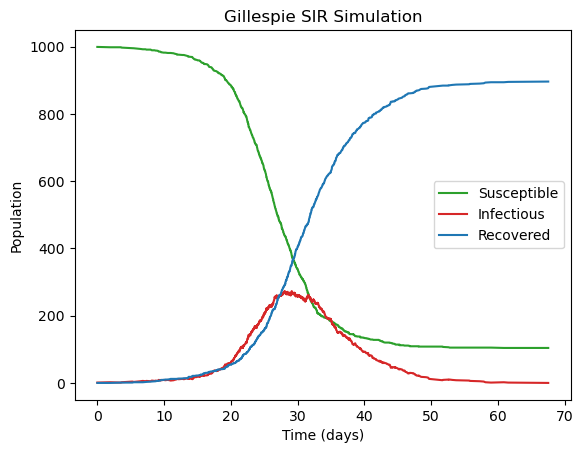

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def gillespie_sir(beta, gamma, S0, I0, R0, total_time):
    
    S = S0 # define initial populations
    I = I0
    R = R0
    t = 0
    
    time_points = [t] # store time and population values
    susceptible = [S]
    infectious = [I]
    recovered = [R]
    
    while t < total_time:

        infection_rate = beta * S * I / (S + I + R) # calculate event rates
        recovery_rate = gamma * I
        total_rate = infection_rate + recovery_rate
        
        if total_rate == 0:
            break
        
        dt = np.random.exponential(1/total_rate) # sampled time until next event
        
        rand = np.random.rand() # determine which event just happened
        if rand < infection_rate / total_rate:
            S -= 1 # updated values if an infection occurs
            I += 1
        else:
            I -= 1 # updated value if a recovery occurs
            R += 1
        
        t += dt # update the time value

        time_points.append(t) # record values after this event
        susceptible.append(S)
        infectious.append(I)
        recovered.append(R)
    
    return time_points, susceptible, infectious, recovered

# Parameters
beta = 0.5  # infection rate
gamma = 0.2  # recovery rate
S0 = 999  # initial susceptible population
I0 = 1  # initial infectious population
R0 = 0  # initial recovered population
total_time = 500  # total simulation time
total_pop = S0 + I0 + R0 # N

# Run gillespie simulation
time_points, susceptible, infectious, recovered = gillespie_sir(beta, gamma, S0, I0, R0, total_time)

plt.plot(time_points, susceptible, label='Susceptible', color="tab:green") # GILLESPIE simulation
plt.plot(time_points, infectious, label='Infectious', color="tab:red")
plt.plot(time_points, recovered, label='Recovered', color="tab:blue")

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Gillespie SIR Simulation')
plt.legend()
plt.show()


## Produce histograms of many simulations

(0.0, 0.66)

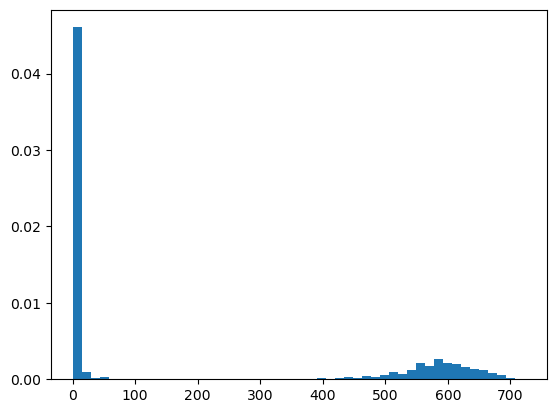

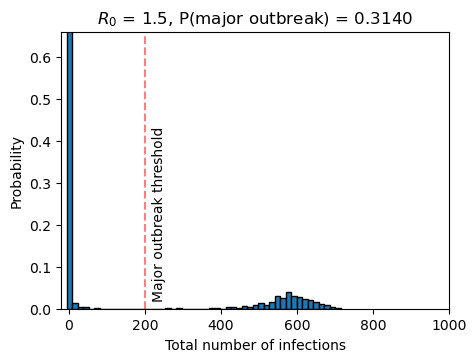

In [33]:
# Histograms

num_runs = 1000 # number of simulations
sizes = [] # stores outbreak sizes
threshold = 200 # treshold becomes more concentrated for smaller R0
outbreaks = 0

beta = 1.5
gamma = 1

for run in range(num_runs):
    total_size = gillespie_sir(beta, gamma, S0, I0, R0, total_time)[-1][-1] # last entry of recovered
    sizes.append(total_size) # sizes of each run
    if total_size >= threshold:
        outbreaks += 1

emp = outbreaks/num_runs # proportion classed as major outbreak

counts, bins, patches = plt.hist(sizes, bins = 50, density=True) # set bins as appropriate
binWidth = bins[1] - bins[0]

plt.figure(figsize=(5,3.6))
plt.bar(bins[:-1], counts*binWidth, binWidth, edgecolor = "black") # ensures y = probability for bin

plt.axvline(x = threshold, color = 'red', linestyle = '--', alpha = 0.5) # major outbreak threshold line
plt.text(threshold+18, 0.025,'Major outbreak threshold',rotation=90) # major outbreak threshold label
plt.title('$R_0$ = 1.5, P(major outbreak) = %1.4f' % emp) # display empirical probability in title
plt.xlabel('Total number of infections')
plt.ylabel('Probability')

plt.xlim([-20, 1000])
plt.ylim([0, 0.66])

# Plot early behaviour, classified by 'major' vs 'minor' outbreaks

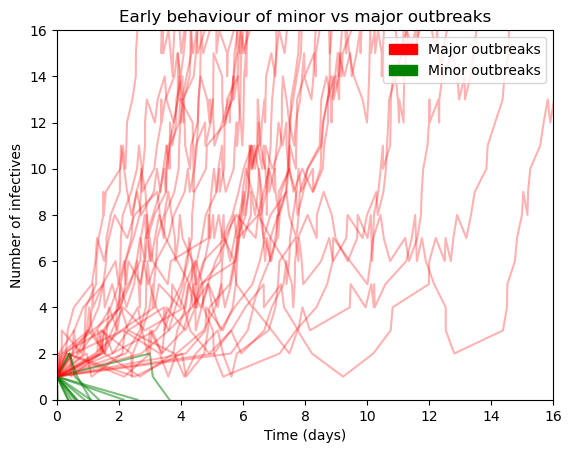

In [34]:
import matplotlib.patches as mpatches

beta, gamma = 0.6, 0.3
runs = 40
threshold = 200 # treshold becomes more concentrated for smaller R0

for run in range(runs):
    time_points, S, I, R = gillespie_sir(beta, gamma, S0, I0, R0, total_time)
    if R[-1] >= threshold:
        plt.plot(time_points, I, color = "red", alpha = 0.3) # colour the trajectories based on final size
    else:
        plt.plot(time_points, I, color = "green", alpha = 0.5) # reduce opacity if number of runs is high

plt.xlabel('Time (days)')
plt.ylabel('Number of infectives')
plt.title('Early behaviour of minor vs major outbreaks')
major = mpatches.Patch(color='red', label='Major outbreaks') # manually add the legend, with colour
minor = mpatches.Patch(color='green', label='Minor outbreaks')
plt.legend(handles=[major, minor], loc = "upper right")
plt.xlim([0, 16]) # restricts the time scale plotted
plt.ylim([0, 16])
plt.show()

## Function to return empirical probability

In [35]:
def get_probability(beta, gamma, runs):
    
    outbreaks = 0
    
    for i in range(runs):
        time_points, S, I, R = gillespie_sir(beta, gamma, 999, 1, 0, 500)
        if R[-1] >= threshold:
            outbreaks += 1
        
    return outbreaks/runs # counts the proportion of runs which exceed outbreak threshold

## Major outbreak probability vs R0

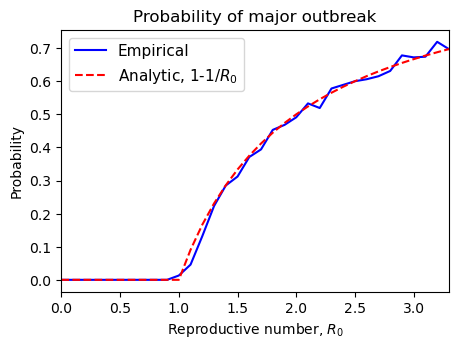

In [36]:
R = [0.1*i for i in range(35)] # values of R
P = [] # stores analytic probabilities
for r in R:
    if 0 <= r <= 1:
        P.append(0)
    else:
        P.append(1-1/r)

P_sims = [get_probability(r, 1, 1000) for r in R] # empirical probabilities for each R

plt.figure(figsize=(5, 3.4))
plt.plot(R, P_sims, color='blue', label = 'Empirical')
plt.plot(R, P, color='red', linestyle='dashed', label = 'Analytic, 1-1/$R_0$')
plt.xlabel("Reproductive number, $R_0$")
plt.ylabel("Probability")
plt.title("Probability of major outbreak")
plt.xlim([0,3.3])
plt.legend(prop={'size':11})
plt.show()